In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import glob

f = open('./irasutoya/image_data.json', 'r')
json_dict = json.load(f)

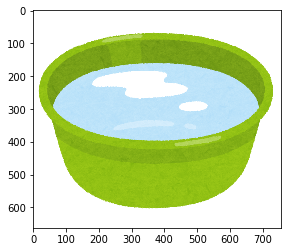

In [3]:
filenames = glob.glob("./irasutoya/images/*")
img = plt.imread(filenames[0])
plt.imshow(img)
plt.show()

In [4]:
for k in json_dict[0].keys():
    print u"{}:  {}".format(k,  json_dict[0][k])

category:  [u'\u304a\u98a8\u5442', u'\u9053\u5177']
title:  水を張った洗面器のイラスト
image_url:  http://3.bp.blogspot.com/-Sg9VCmfS6oM/WerK_d3MAjI/AAAAAAABHsI/EQP1PpFYrogSO4mgm159bmDfoVkYTuwwgCLcBGAs/s800/ofuro_sentaku_senmenki_water.png
desc:  洗面器の中に水やお湯が入れられているイラストです。
save_name:  images/1.png
page_url:  http://www.irasutoya.com/2017/11/blog-post_270.html


In [5]:
for i in range(len(json_dict))[:5]:
    print json_dict[i]["title"]

水を張った洗面器のイラスト
洗面器のイラスト
水風呂のイラスト
滝廉太郎の似顔絵イラスト
貯金に失敗した人のイラスト（女性）


In [6]:
# コピペした英語のタイトルを読み込む
f = open('./misc/all_title_en.txt')
data1 = f.read()  # ファイル終端まで全て読んだデータを返す
f.close()
lines1 = data1.split('\n') # 改行で区切る(改行文字そのものは戻り値のデータには含まれない)

In [7]:
# 英語のタイトルをつける
for i in range(len(json_dict)):
    json_dict[i]["title_en"] = lines1[i]

In [8]:
save_json = './misc/image_data.json'
with open(save_json, 'w') as f:
    json.dump(json_dict, f)

## word2vec

参考: https://qiita.com/Hironsan/items/8f7d35f0a36e0f99752c

In [11]:
import logging
import pprint

In [9]:
import gensim

# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format('./weights/GoogleNews-vectors-negative300.bin', binary=True)

test

In [5]:
import logging
import pprint

# for logging                                                                                                                                                                                                                                                                      
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
# Load evaluation dataset of analogy task                                                                                                                                                                                                                                          
model.accuracy('./misc/questions-words.txt')
# execute analogy task like king - man + woman = queen                                                                                                                                                                                                                             
pprint.pprint(model.most_similar(positive=['woman', 'king'], negative=['man']))

2017-12-21 07:32:35,110 : INFO : precomputing L2-norms of word weight vectors
2017-12-21 07:32:43,790 : INFO : capital-common-countries: 83.6% (423/506)
2017-12-21 07:32:48,801 : INFO : capital-world: 82.7% (1144/1383)
2017-12-21 07:32:49,274 : INFO : currency: 39.8% (51/128)
2017-12-21 07:32:57,746 : INFO : city-in-state: 74.6% (1739/2330)
2017-12-21 07:32:59,031 : INFO : family: 90.1% (308/342)
2017-12-21 07:33:01,994 : INFO : gram1-adjective-to-adverb: 32.3% (262/812)
2017-12-21 07:33:03,426 : INFO : gram2-opposite: 50.5% (192/380)
2017-12-21 07:33:08,340 : INFO : gram3-comparative: 91.9% (1224/1332)
2017-12-21 07:33:10,941 : INFO : gram4-superlative: 88.0% (618/702)
2017-12-21 07:33:14,140 : INFO : gram5-present-participle: 79.8% (694/870)
2017-12-21 07:33:18,673 : INFO : gram6-nationality-adjective: 97.1% (1193/1229)
2017-12-21 07:33:24,126 : INFO : gram7-past-tense: 66.5% (986/1482)
2017-12-21 07:33:27,730 : INFO : gram8-plural: 85.6% (849/992)
2017-12-21 07:33:30,253 : INFO : gr

[(u'queen', 0.7118192315101624),
 (u'monarch', 0.6189674139022827),
 (u'princess', 0.5902431011199951),
 (u'crown_prince', 0.5499460697174072),
 (u'prince', 0.5377321839332581),
 (u'kings', 0.5236844420433044),
 (u'Queen_Consort', 0.5235946178436279),
 (u'queens', 0.5181134343147278),
 (u'sultan', 0.5098593235015869),
 (u'monarchy', 0.5087412595748901)]


- 文を単語で区切ってベクトルの平均をとって、そのベクトル同士のcos類似度を測る

In [15]:
pprint.pprint(model.most_similar(positive=['woman', 'king'], negative=['man']))

[(u'queen', 0.7118192315101624),
 (u'monarch', 0.6189674139022827),
 (u'princess', 0.5902431011199951),
 (u'crown_prince', 0.5499460697174072),
 (u'prince', 0.5377321839332581),
 (u'kings', 0.5236844420433044),
 (u'Queen_Consort', 0.5235946178436279),
 (u'queens', 0.5181134343147278),
 (u'sultan', 0.5098593235015869),
 (u'monarchy', 0.5087412595748901)]
